In [2]:
import pandas as pd
import numpy as np

In [3]:
data_liga = pd.read_csv('Datos/2017-2018.1eraDivision(FT,HTresults;matchstats;match,totalgoals,AHodds).csv')
features = ['Date', 'HomeTeam', 'AwayTeam',
            'BbAvH', 'BbAvD', 'BbAvA',
            'B365H', 'B365D', 'B365A',
            'FTHG', 'FTAG', 'FTR']
data = data_liga[features]

def expected_returns(data, h, d, a, ncol, name_column):
    new_col = data.apply(lambda x: 1/x[h] + 1/x[d] + 1/x[a], axis=1)
    data.insert(loc=ncol, column=name_column, value=new_col)
expected_returns(data, 'BbAvH', 'BbAvD', 'BbAvA', 6, 'BbAvHRet')

def predictions(data, h, d, a, rets, ncol):
    ph = data.apply(lambda x: 1/x[h]/x[rets], axis=1)
    pd = data.apply(lambda x: 1/x[d]/x[rets], axis=1)
    pa = data.apply(lambda x: 1/x[a]/x[rets], axis=1)
    data.insert(loc=ncol, column='ph', value=ph)
    data.insert(loc=ncol+1, column='pd', value=pd)
    data.insert(loc=ncol+2, column='pa', value=pa)
predictions(data, 'BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet', 7)
data = data.drop(['BbAvH', 'BbAvD', 'BbAvA', 'BbAvHRet'], axis=1)

new_col = data.apply(lambda x: x['Date'].split('/')[1], axis=1)
data.insert(loc=1, column='Month', value=new_col)

In [4]:
data_fifa = pd.read_csv('Datos/Features_FIFA_score/fifaindex_1718.csv')
def transform_month(data):
    # ADD 1 MONTH BECOUSE DATA IS TAKEN AT THE FINAL OF THE MONTH
    # THUS FOR ANALYSIS IN THE MATCHES OF OCTOBER I USE DATA OF SEPTEMBER
    # IN AUGUST WE DO NOT HAVE DATA OF JULY SO I WILL REPEATE AND USE THE DATA OF FINALS OF MONTH
    data.loc[data['Date'] == 8, 'Date'] = '09'
    data.loc[data['Date'] == 9, 'Date'] = '10'
    data.loc[data['Date'] == 10, 'Date'] = '11'
    data.loc[data['Date'] == 11, 'Date'] = '12'
    data.loc[data['Date'] == 12, 'Date'] = '01'
    data.loc[data['Date'] == 1, 'Date'] = '02'
    data.loc[data['Date'] == 2, 'Date'] = '03'
    data.loc[data['Date'] == 3, 'Date'] = '04'
    data.loc[data['Date'] == 4, 'Date'] = '05'
    data.loc[data['Date'] == 5, 'Date'] = '06'

def transform_team(data):
    data.loc[data['Team'] == 'FC Barcelona', 'Team'] = 'Barcelona'
    data.loc[data['Team'] == 'Atlético Madrid', 'Team'] = 'Ath Madrid'
    data.loc[data['Team'] == 'Valencia CF', 'Team'] = 'Valencia'
    data.loc[data['Team'] == 'Villarreal CF', 'Team'] = 'Villarreal'
    data.loc[data['Team'] == 'Real Betis', 'Team'] = 'Betis'
    data.loc[data['Team'] == 'Athletic Bilbao', 'Team'] = 'Ath Bilbao'
    data.loc[data['Team'] == 'Sevilla FC', 'Team'] = 'Sevilla'
    data.loc[data['Team'] == 'SD Eibar', 'Team'] = 'Eibar'
    data.loc[data['Team'] == 'Celta Vigo', 'Team'] = 'Celta'
    data.loc[data['Team'] == 'Real Sociedad', 'Team'] = 'Sociedad'
    data.loc[data['Team'] == 'Getafe CF', 'Team'] = 'Getafe'
    data.loc[data['Team'] == 'RCD Espanyol', 'Team'] = 'Espanol'
    data.loc[data['Team'] == 'Girona CF', 'Team'] = 'Girona'
    data.loc[data['Team'] == 'Levante UD', 'Team'] = 'Levante'
    data.loc[data['Team'] == 'Deport. Alavés', 'Team'] = 'Alaves'
    data.loc[data['Team'] == 'CD Leganés', 'Team'] = 'Leganes'
    data.loc[data['Team'] == 'RC Deportivo', 'Team'] = 'La Coruna'
    data.loc[data['Team'] == 'UD Las Palmas', 'Team'] = 'Las Palmas'
    data.loc[data['Team'] == 'Málaga CF', 'Team'] = 'Malaga'
transform_month(data_fifa)
transform_team(data_fifa)

In [5]:
def add_team_score(data, data_scores):
    ATTH, MIDH, DEFH, ATTA, MIDA, DEFA = [], [], [], [], [], []
    for h, a, m in data[['HomeTeam', 'AwayTeam', 'Month']].values:
        if m == '08': # DATA BEGINS MID AUGUST, TAKE AUGUST IN MATCHES OF AUGUST AS WELL AS SEPTEMBER
            m = '09'
        ATTH.append(data_scores['ATT'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        MIDH.append(data_scores['MID'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        DEFH.append(data_scores['DEF'][(data_scores['Team'] == h) & (data_scores['Date'] == m)].values[0])
        ATTA.append(data_scores['ATT'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        MIDA.append(data_scores['MID'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
        DEFA.append(data_scores['DEF'][(data_scores['Team'] == a) & (data_scores['Date'] == m)].values[0])
    data.insert(loc=4, column='ATTH', value=ATTH)
    data.insert(loc=5, column='MIDH', value=MIDH)
    data.insert(loc=6, column='DEFH', value=DEFH)
    data.insert(loc=7, column='ATTA', value=ATTA)
    data.insert(loc=8, column='MIDA', value=MIDA)
    data.insert(loc=9, column='DEFA', value=DEFA)
add_team_score(data, data_fifa)

In [6]:
data.head()

,Date,Month,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR
0,18/08/17,08,Leganes,Alaves,74,75,74,70,75,74,0.469207,0.302378,0.228415,2.05,3.20,4.10,1,0,H
1,18/08/17,08,Valencia,Las Palmas,78,80,79,75,78,76,0.538964,0.247142,0.213894,1.75,3.80,4.50,1,0,H
2,19/08/17,08,Celta,Sociedad,77,78,78,81,79,77,0.397788,0.286360,0.315852,2.38,3.25,3.20,2,3,A
3,19/08/17,08,Girona,Ath Madrid,76,73,73,84,82,84,0.126685,0.228762,0.644553,8.00,4.33,1.45,2,2,D
4,19/08/17,08,Sevilla,Espanol,80,80,79,78,79,76,0.585867,0.242993,0.171140,1.62,4.00,5.50,1,1,D


# MIRO CON EL MODELO DE 2018/2019

In [7]:
from keras.models import load_model
model = load_model('model_bets_hoy.h5', compile = False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
all_x = data.values[:, 4:13]
preds = model.predict(all_x)
predictions = []
for i in preds:
    if np.argmax(i) == 0:
        predictions.append('H')
    elif np.argmax(i) == 1:
        predictions.append('A')
    elif np.argmax(i) == 2:
        predictions.append('D')
    elif np.argmax(i) == 3:
        predictions.append('NO')
data['Preds'] = predictions
data.head()

,Date,Month,HomeTeam,AwayTeam,ATTH,MIDH,DEFH,ATTA,MIDA,DEFA,ph,pd,pa,B365H,B365D,B365A,FTHG,FTAG,FTR,Preds
0,18/08/17,08,Leganes,Alaves,74,75,74,70,75,74,0.469207,0.302378,0.228415,2.05,3.20,4.10,1,0,H,D
1,18/08/17,08,Valencia,Las Palmas,78,80,79,75,78,76,0.538964,0.247142,0.213894,1.75,3.80,4.50,1,0,H,NO
2,19/08/17,08,Celta,Sociedad,77,78,78,81,79,77,0.397788,0.286360,0.315852,2.38,3.25,3.20,2,3,A,NO
3,19/08/17,08,Girona,Ath Madrid,76,73,73,84,82,84,0.126685,0.228762,0.644553,8.00,4.33,1.45,2,2,D,NO
4,19/08/17,08,Sevilla,Espanol,80,80,79,78,79,76,0.585867,0.242993,0.171140,1.62,4.00,5.50,1,1,D,NO


In [9]:
def accuracy_predictions(data, predict, house_bet_h, house_bet_a, house_bet_d):
    i = 0
    gain_journey = []
    for j in range(int(len(data)/10)):
        print('- Jornada nº{}/{}'.format(j+1,len(data)/10))
        betted = 0
        accuracy = 0
        profits = 0
        for k in range(10):
            if data[predict][i] == 'H':
                betted += 1
                if data['FTR'][i] == 'H':
                    accuracy += 1
                    profits += (data[house_bet_h][i])
            if data[predict][i] == 'A':
                betted += 1
                if data['FTR'][i] == 'A':
                    accuracy += 1
                    profits += (data[house_bet_a][i])
            if data[predict][i] == 'D':
                betted += 1
                if data['FTR'][i] == 'D':
                    accuracy += 1
                    profits += (data[house_bet_d][i])
            i+=1
        print('    Accuracy = {}/{}'.format(accuracy, betted))
        print('    Profits = {}€'.format(profits))
        print('    Win (or lost) = {}€\n'.format(profits-betted))
        gain_journey.append(profits-betted)
    return gain_journey
        
gain_journey = accuracy_predictions(data, 'Preds', 'B365H', 'B365A', 'B365D')

- Jornada nº1/38.0
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº2/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº3/38.0
    Accuracy = 1/2
    Profits = 15.0€
    Win (or lost) = 13.0€

- Jornada nº4/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº5/38.0
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº6/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº7/38.0
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº8/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº9/38.0
    Accuracy = 0/1
    Profits = 0€
    Win (or lost) = -1€

- Jornada nº10/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº11/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº12/38.0
    Accuracy = 0/0
    Profits = 0€
    Win (or lost) = 0€

- Jornada nº13/38.0
    Accuracy = 0/0


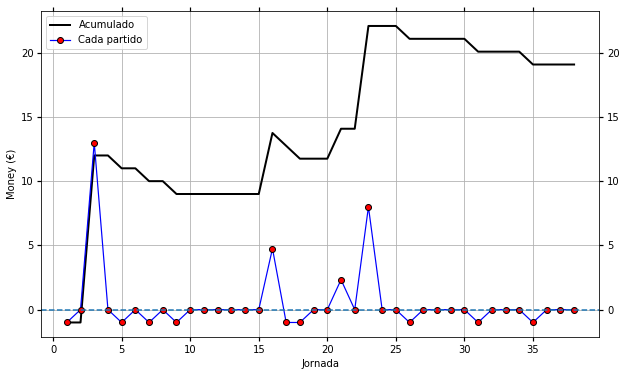

In [12]:
import matplotlib.pyplot as plt
gain_journey = np.array(gain_journey)
fig, ax = plt.subplots(figsize=(10,6))
ax.tick_params(which='both',direction='out', length=4, width = 1.2,
        labelbottom=True,labeltop=False,labelleft=True,
        labelright=True,bottom=True,top=True,left=True,right=True)

ax.plot(range(1,int(len(data)/10)+1), [np.sum(gain_journey[:i]) for i in range(1,int(len(data)/10)+1)],
        color='k', lw=2, label='Acumulado')
ax.plot(range(1,int(len(data)/10)+1), gain_journey, marker='o', color='blue', mec='k', mfc='r', 
        linewidth=1.2, label='Cada partido')
ax.axhline(y=0, ls='--')
ax.set_xlabel('Jornada')
ax.set_ylabel('Money (€)')
ax.legend(loc=2)
plt.grid(True)

fig.savefig('VirtualGain1718.png', bbox_inches='tight')